In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""
Imports
"""

import os
from dataclasses import dataclass

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T
import torchvision.transforms.functional as TF
import lightning as L
import lightning.pytorch as pl

torch.set_float32_matmul_precision('medium')

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

# Check Data Module

In [6]:
train_ds = torchvision.datasets.MNIST(
                root='D:/mnist_reconstruction/data/train',
                train=True,
                download=True
            )

In [8]:
train_ds

Dataset MNIST
    Number of datapoints: 60000
    Root location: D:/mnist_reconstruction/data/train
    Split: Train

In [9]:
train_ds[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [10]:
train_ds[0][0]

In [13]:
from mnist_recon_train import MNISTReconDataModule
dm = MNISTReconDataModule()

In [14]:
dm.setup(stage='fit')

18:59:05 | INFO     | Total Dataset       : 60000 samples
18:59:05 | INFO     | Train Dataset       : 48000 samples
18:59:05 | INFO     | Validation Dataset  : 12000 samples


In [15]:
dm.train_dataset

In [19]:
dl = dm.train_dataloader()
batch = next(iter(dl))

In [20]:
len(batch)

2

In [21]:
X, y = batch
X.shape, y.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

# Visualize Samples

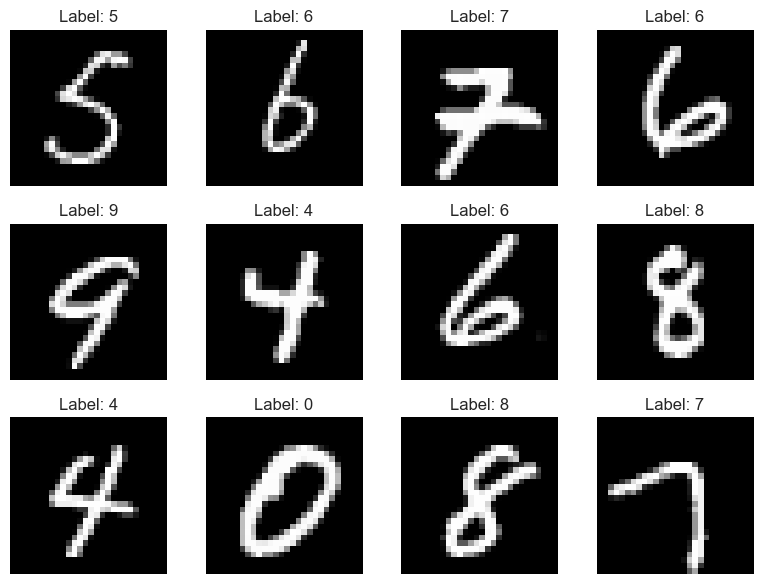

In [23]:
from utils.visualize import visualize_X_samples_grid
visualize_X_samples_grid(X, y, n_samples=12, n_cols=4)

# Check Model

In [32]:
encoding_dim = 128  # 2nd layer num features (the latent dim)
flat_image_length = 28 * 28  # MNIST image shape : 28 * 28

from mnist_recon_train import MNISTReconAutoencoder
model = MNISTReconAutoencoder(flat_image_length, encoding_dim=128)

In [36]:
X.shape, X[0].shape

(torch.Size([128, 1, 28, 28]), torch.Size([1, 28, 28]))

In [37]:
out = model(X)
out.shape

20:54:01 | DEBUG    | Input shape : torch.Size([128, 1, 28, 28])
20:54:01 | DEBUG    | Flattened : torch.Size([128, 784])
20:54:01 | DEBUG    | Encoder Output shape : torch.Size([128, 128])
20:54:01 | DEBUG    | Decoder Output shape : torch.Size([128, 784])
20:54:01 | DEBUG    | Reshape back to original : torch.Size([128, 1, 28, 28])


torch.Size([128, 1, 28, 28])

In [34]:
out = model(X[0])
out.shape

20:53:22 | DEBUG    | Input shape : torch.Size([1, 28, 28])
20:53:22 | DEBUG    | Flattened : torch.Size([1, 784])
20:53:22 | DEBUG    | Encoder Output shape : torch.Size([1, 128])
20:53:22 | DEBUG    | Decoder Output shape : torch.Size([1, 784])
20:53:22 | DEBUG    | Reshape back to original : torch.Size([1, 1, 28, 28])


torch.Size([1, 1, 28, 28])

# Check Lightning